## Importing Libraries 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing Dataset

In [37]:
dataset=pd.read_csv("House_Rent_Dataset.csv")
#Dropping Date column
dataset=dataset.drop(['Posted On','Area Locality','Tenant Preferred','Area Type','Point of Contact'], axis=1)


## Visualisation of Data

In [38]:
dataset.head()


,BHK,Size,Floor,City,Furnishing Status,Bathroom,Rent
0,2,1100,Ground out of 2,Kolkata,Unfurnished,2,10000
1,2,800,1 out of 3,Kolkata,Semi-Furnished,1,20000
2,2,1000,1 out of 3,Kolkata,Semi-Furnished,1,17000
3,2,800,1 out of 2,Kolkata,Unfurnished,1,10000
4,2,850,1 out of 2,Kolkata,Unfurnished,1,7500


In [39]:
## Variable selection
# Remove date as all records are of 2022
# From FLoor data make Max Floor and Min Floor
# Check no of categories in Area Type, City, Furnishing Status, Tenant Prefered, Point of Contact
# Remove Floor, Area Type, Area Locality, City, Furnishing Status, Tenant Prefered, Point of Contact

In [40]:
#Checking the Categorical Columns
print('Categorical columns are : ',dataset.select_dtypes(include=['object']).columns.tolist())

Categorical columns are :  ['Floor', 'City', 'Furnishing Status']


## Checking the Dependance of Rent on the Classes of Each Categorical Values

<AxesSubplot:xlabel='City', ylabel='Rent'>

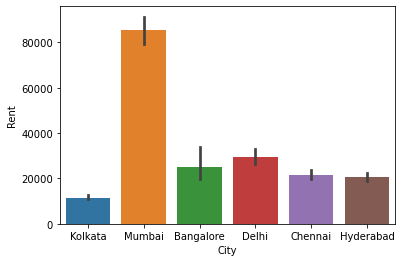

In [41]:
# Trend of Rent from city
sns.barplot(x = 'City',y = 'Rent',data = dataset)

In [42]:
#Trend of Rent from Area Type
sns.barplot(x = 'Area Type',y = 'Rent',data = dataset)

ValueError: Could not interpret input 'Area Type'

<AxesSubplot:xlabel='Furnishing Status', ylabel='Rent'>

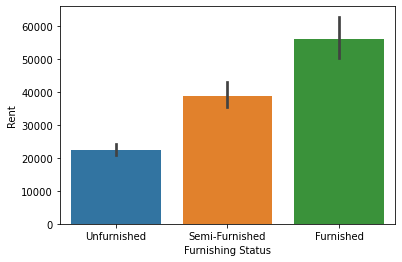

In [43]:
#Trend of Rent from Furnishing Status
sns.barplot(x = 'Furnishing Status',y = 'Rent',data = dataset)

In [44]:
#Trend of Rent from Point of Contact
sns.barplot(x = 'Point of Contact',y = 'Rent',data = dataset)

ValueError: Could not interpret input 'Point of Contact'

## Data Formating 

In [45]:
# Converting Floor column to Max and Min Floor

floor=dataset['Floor'].to_numpy()
max_floor=[]
min_floor=[]
for i in floor:
    words=i.split(' ')
    min_no=words[0]
    max_no=words[-1]
    if(min_no=='Ground'):
        min_no=int(0)
    if(min_no=='Upper'):
        min_no=int(0)
    if(min_no=='Lower'):
        min_no=int(-1)
    if(max_no=='Ground'):
        max_no=int(0)
    min_floor.append(min_no)
    max_floor.append(max_no)

dataset.insert(0, 'max_floor', max_floor)
dataset.insert(0, 'min_floor', min_floor)

dataset['max_floor']=dataset['max_floor'].astype(int)
dataset['min_floor']=dataset['min_floor'].astype(int)
dataset=dataset.drop(['Floor'],axis=1)

In [46]:
#Encoding all other categorical variables
cat_column_names=dataset.select_dtypes(include=['object']).columns.tolist()
print('The Remaining Categorical Columns',cat_column_names)
for i in cat_column_names:
    categories=list(dataset[i].value_counts().index)
    
    n=(len(categories))
    dummy=np.zeros([len(dataset['BHK'].values),n])
    for j in range(len(dataset['BHK'].values)):
        p=categories.index(dataset[i].values[j])
        dummy[j][p]=1
    for j in range(len(categories)):
        dataset.insert(0, categories[j], np.transpose(dummy)[j])
        dataset[categories[j]]=dataset[categories[j]].astype(int)

The Remaining Categorical Columns ['City', 'Furnishing Status']


In [47]:
# Dataset after all Categorical Variables are encoded
dataset.head()


,Furnished,Unfurnished,Semi-Furnished,Kolkata,Delhi,Hyderabad,Bangalore,Chennai,Mumbai,min_floor,max_floor,BHK,Size,City,Furnishing Status,Bathroom,Rent
0,0,1,0,1,0,0,0,0,0,0,2,2,1100,Kolkata,Unfurnished,2,10000
1,0,0,1,1,0,0,0,0,0,1,3,2,800,Kolkata,Semi-Furnished,1,20000
2,0,0,1,1,0,0,0,0,0,1,3,2,1000,Kolkata,Semi-Furnished,1,17000
3,0,1,0,1,0,0,0,0,0,1,2,2,800,Kolkata,Unfurnished,1,10000
4,0,1,0,1,0,0,0,0,0,1,2,2,850,Kolkata,Unfurnished,1,7500


In [48]:
#Dropping Unnessary Categorical Variables
cat_column_names
for i in cat_column_names:
    dataset=dataset.drop([i],axis=1)
#After dropping columns
dataset.head()
dataset.describe()

,Furnished,Unfurnished,Semi-Furnished,Kolkata,Delhi,Hyderabad,Bangalore,Chennai,Mumbai,min_floor,max_floor,BHK,Size,Bathroom,Rent
count,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4.745000e+03
mean,0.143098,0.382508,0.474394,0.110221,0.127503,0.182929,0.186723,0.187777,0.204847,3.443836,6.969863,2.083667,967.423604,1.965859,3.499240e+04
std,0.350210,0.486051,0.499397,0.313198,0.333570,0.386649,0.389730,0.390575,0.403632,5.769155,9.467846,0.832237,634.252305,0.884625,7.811461e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,10.000000,1.000000,1.200000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,550.000000,1.000000,1.000000e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2.000000,850.000000,2.000000,1.600000e+04
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000,3.000000,1200.000000,2.000000,3.300000e+04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.000000,89.000000,6.000000,8000.000000,10.000000,3.500000e+06


## Checking for Missing Data

In [49]:
print("Number of Missing Data : ",dataset.isnull().values.sum())


Number of Missing Data :  0


## Building Dependent and Independent Variables 

In [50]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [52]:
print('No of Data points in each set::')
print("X train Length : ",len(X_train))
print("X test Length : ",len(X_test))
print("Y train Length : ",len(Y_train))
print("Y test Length : ",len(Y_test))

No of Data points in each set::
X train Length :  3558
X test Length :  1187
Y train Length :  3558
Y test Length :  1187


## Training multiple linear regressor (MLR):

In [53]:
from sklearn.linear_model import LinearRegression
Linear_regressor=LinearRegression()
Linear_regressor.fit(X_train,Y_train)

#Prediction of Multiple Linear Regressor
print('Prediction of First Data Point: ',int(Linear_regressor.predict(X[0].reshape(1,-1))),'; Actual Value: ',Y[0] )

Prediction of First Data Point:  27308 ; Actual Value:  10000


## Training decision tree regressor (DT):

In [54]:
## Training Model

from sklearn.tree import DecisionTreeRegressor
Decision_Tree_regressor=DecisionTreeRegressor()
Decision_Tree_regressor.fit(X_train,Y_train)

## Prediction of Decision Tree Regression Model

print('Prediction of First Data Point: ',int(Decision_Tree_regressor.predict(X[0].reshape(1,-1))),'; Actual Value: ',Y[0] )

Prediction of First Data Point:  16500 ; Actual Value:  10000


## Training random forest regressor (RF):

In [55]:
## Training Model

from sklearn.ensemble import RandomForestRegressor
Random_Forest_regressor=RandomForestRegressor(n_estimators=500,max_depth=10,random_state=0)
Random_Forest_regressor.fit(X_train,Y_train)

#Prediction of Random Forest Regressor
print('Prediction of First Data Point: ',int(Random_Forest_regressor.predict(X[0].reshape(1,-1))),'; Actual Value: ',Y[0] )

Prediction of First Data Point:  14428 ; Actual Value:  10000


## Feature scaling for support vector regressor(SVR) : 

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train1=sc.fit_transform(X_train)
X_test1=sc.transform(X_test)
sc2=StandardScaler()
Y_train1=sc2.fit_transform(Y_train.reshape(-1,1))

## Training SVR:

In [57]:
#Training Model

from sklearn.svm import SVR
SVM_regressor=SVR(C=1,kernel='rbf',gamma=1)
SVM_regressor.fit(X_train1,Y_train1)

#Prediction of Support Vector Regressor
print('Prediction of First Data Point: ',int(sc2.inverse_transform(SVM_regressor.predict(sc.transform(X[0].reshape(1,-1))).reshape(-1,1))),'; Actual Value: ',Y[0] )


C:\Users\ARNAB SARKAR\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction of First Data Point:  14026 ; Actual Value:  10000


## Evaluation of the performance of all model with the test data:

In [58]:
n=1000
sp=10
print('Actual Value and Predictions from different Machine Learning Models:')
print('original :',Y[n])
print('MLR :',int(Linear_regressor.predict(X[n].reshape(1,-1))))
print('SVR :',int(sc2.inverse_transform(SVM_regressor.predict(sc.transform(X[n].reshape(1,-1))).reshape(1,-1))))
print('RF :',int(Random_Forest_regressor.predict(X[n].reshape(1,-1))))
print('DT :',int(Decision_Tree_regressor.predict(X[n].reshape(1,-1))))

Actual Value and Predictions from different Machine Learning Models:
original : 1200000
MLR : 251246
SVR : 121756
RF : 933385
DT : 1200000


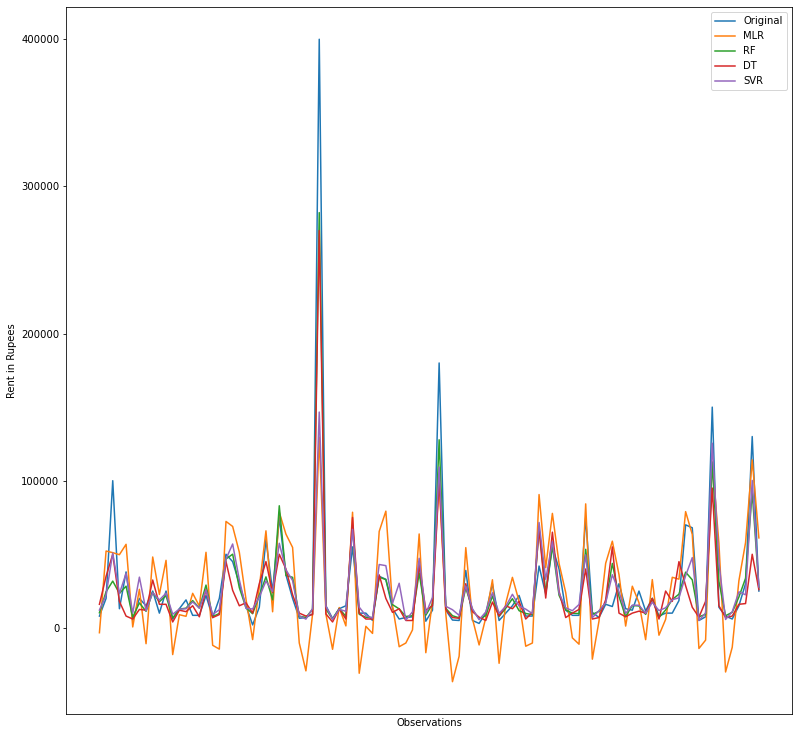

R2 score of RF model ==>  0.8580433595890536
Mean absolute percentage of RF modelv 0.3804572189811044
R2 score of MLR model ==>  0.44033889084450173
Mean absolute percentage of MLR model ==>  1.518289638433213
R2 score of DT model ==>  0.7765434076884226
Mean absolute percentage of DT model ==>  0.4701916206035228
R2 score of SVR model ==>  0.6348951578776937
Mean absolute percentage of SVR model ==>  0.5022852729951329


In [59]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
y_pre_random=[]
y_pre_SVR=[]
y_pre_DT=[]
y_pre_MLR=[]
for i in range(0,n,sp):
    y_pre_random.append(int(Random_Forest_regressor.predict(X_test[i].reshape(1,-1))))
    y_pre_MLR.append(int(Linear_regressor.predict(X_test[i].reshape(1,-1))))
    y_pre_DT.append(int(Decision_Tree_regressor.predict(X_test[i].reshape(1,-1))))
    y_pre_SVR.append(int(sc2.inverse_transform(SVM_regressor.predict(sc.transform(X_test[i].reshape(1,-1))).reshape(-1,1))))
#Ploting Data
plt.figure(figsize=(13,13))
plt.plot(range(100),Y_test[0:n:sp])
plt.plot(range(100),y_pre_MLR)
plt.plot(range(100),y_pre_random)
plt.plot(range(100),y_pre_DT)
plt.plot(range(100),y_pre_SVR)
#plt.rcParams["font.size"] = "2"
plt.legend(['Original','MLR','RF','DT','SVR'])
plt.ylabel('Rent in Rupees')
plt.xlabel('Observations')
plt.tick_params(bottom = False,labelbottom = False)

plt.show()

print('R2 score of RF model ==> ',r2_score(Y_test[0:n:sp],y_pre_random))
print('Mean absolute percentage of RF modelv',mean_absolute_percentage_error(Y_test[0:n:sp],y_pre_random))

print('R2 score of MLR model ==> ',r2_score(Y_test[0:n:sp],y_pre_MLR))
print('Mean absolute percentage of MLR model ==> ',mean_absolute_percentage_error(Y_test[0:n:sp],y_pre_MLR))

print('R2 score of DT model ==> ',r2_score(Y_test[0:n:sp],y_pre_DT))
print('Mean absolute percentage of DT model ==> ',mean_absolute_percentage_error(Y_test[0:n:sp],y_pre_DT))

print('R2 score of SVR model ==> ',r2_score(Y_test[0:n:sp],y_pre_SVR))
print('Mean absolute percentage of SVR model ==> ',mean_absolute_percentage_error(Y_test[0:n:sp],y_pre_SVR))



## Save Model 

In [26]:
import pickle

In [26]:
pickle.dump(Random_Forest_regressor, open('../Models/model.pkl','wb'))

In [27]:
X[0]

array([   0,    0,    1,    0,    1,    0,    1,    0,    0,    0,    0,
          0,    0,    0,    1,    0,    2,    2, 1100,    2], dtype=int64)

In [30]:
X_test[0].reshape(1,-1)

array([[  0,   0,   1,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   1,   1,   2,   2, 600,   1]], dtype=int64)

In [27]:
with open('rent_model.pickle','wb')as f:
    pickle.dump(Random_Forest_regressor,f)

In [28]:
import json

In [31]:
columns={
    'data_columns' : [col.lower() for col in dataset.columns[:-1]]
}

with open("columns.json",'w') as f:
    f.write(json.dumps(columns))